In [ ]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")


# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.tools.monitor import job_monitor
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.circuit.library.n_local.two_local import ZGate
from qiskit.circuit.library import MCMT
sim = Aer.get_backend('aer_simulator')

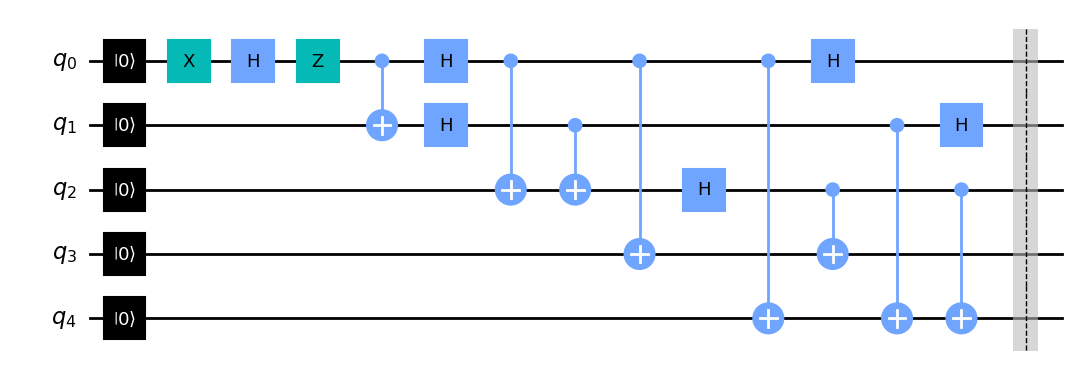

In [3]:
qc = QuantumCircuit(5)
qc.reset(range(5))
controlz = MCMT('cz', 1, 2)
qc.x(0)
qc.h(0) 
qc.z(0)

qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.cx(0, 2)
qc.cx(1, 2)
qc.h(2)

qc.cx(0, 3)
qc.cx(2, 3)

qc.cx(0, 4)
qc.cx(1, 4)
qc.cx(2, 4)

qc.h(0)
qc.h(1)

qc.barrier()
qc.draw('mpl')

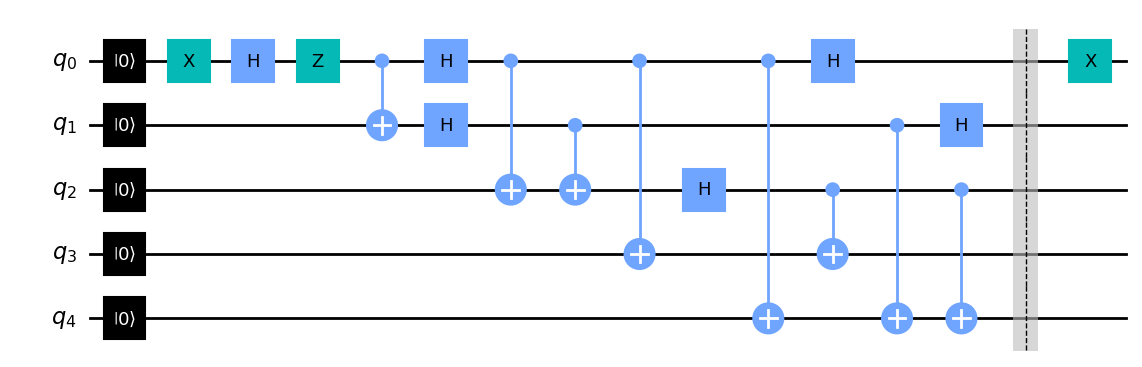

In [4]:
qc.x(0)
#qc.h(3)

qc.draw('mpl')

In [5]:
qc.add_register(QuantumRegister(4, 'aux'))
qc.add_register(ClassicalRegister(4, 'syn_detection'))

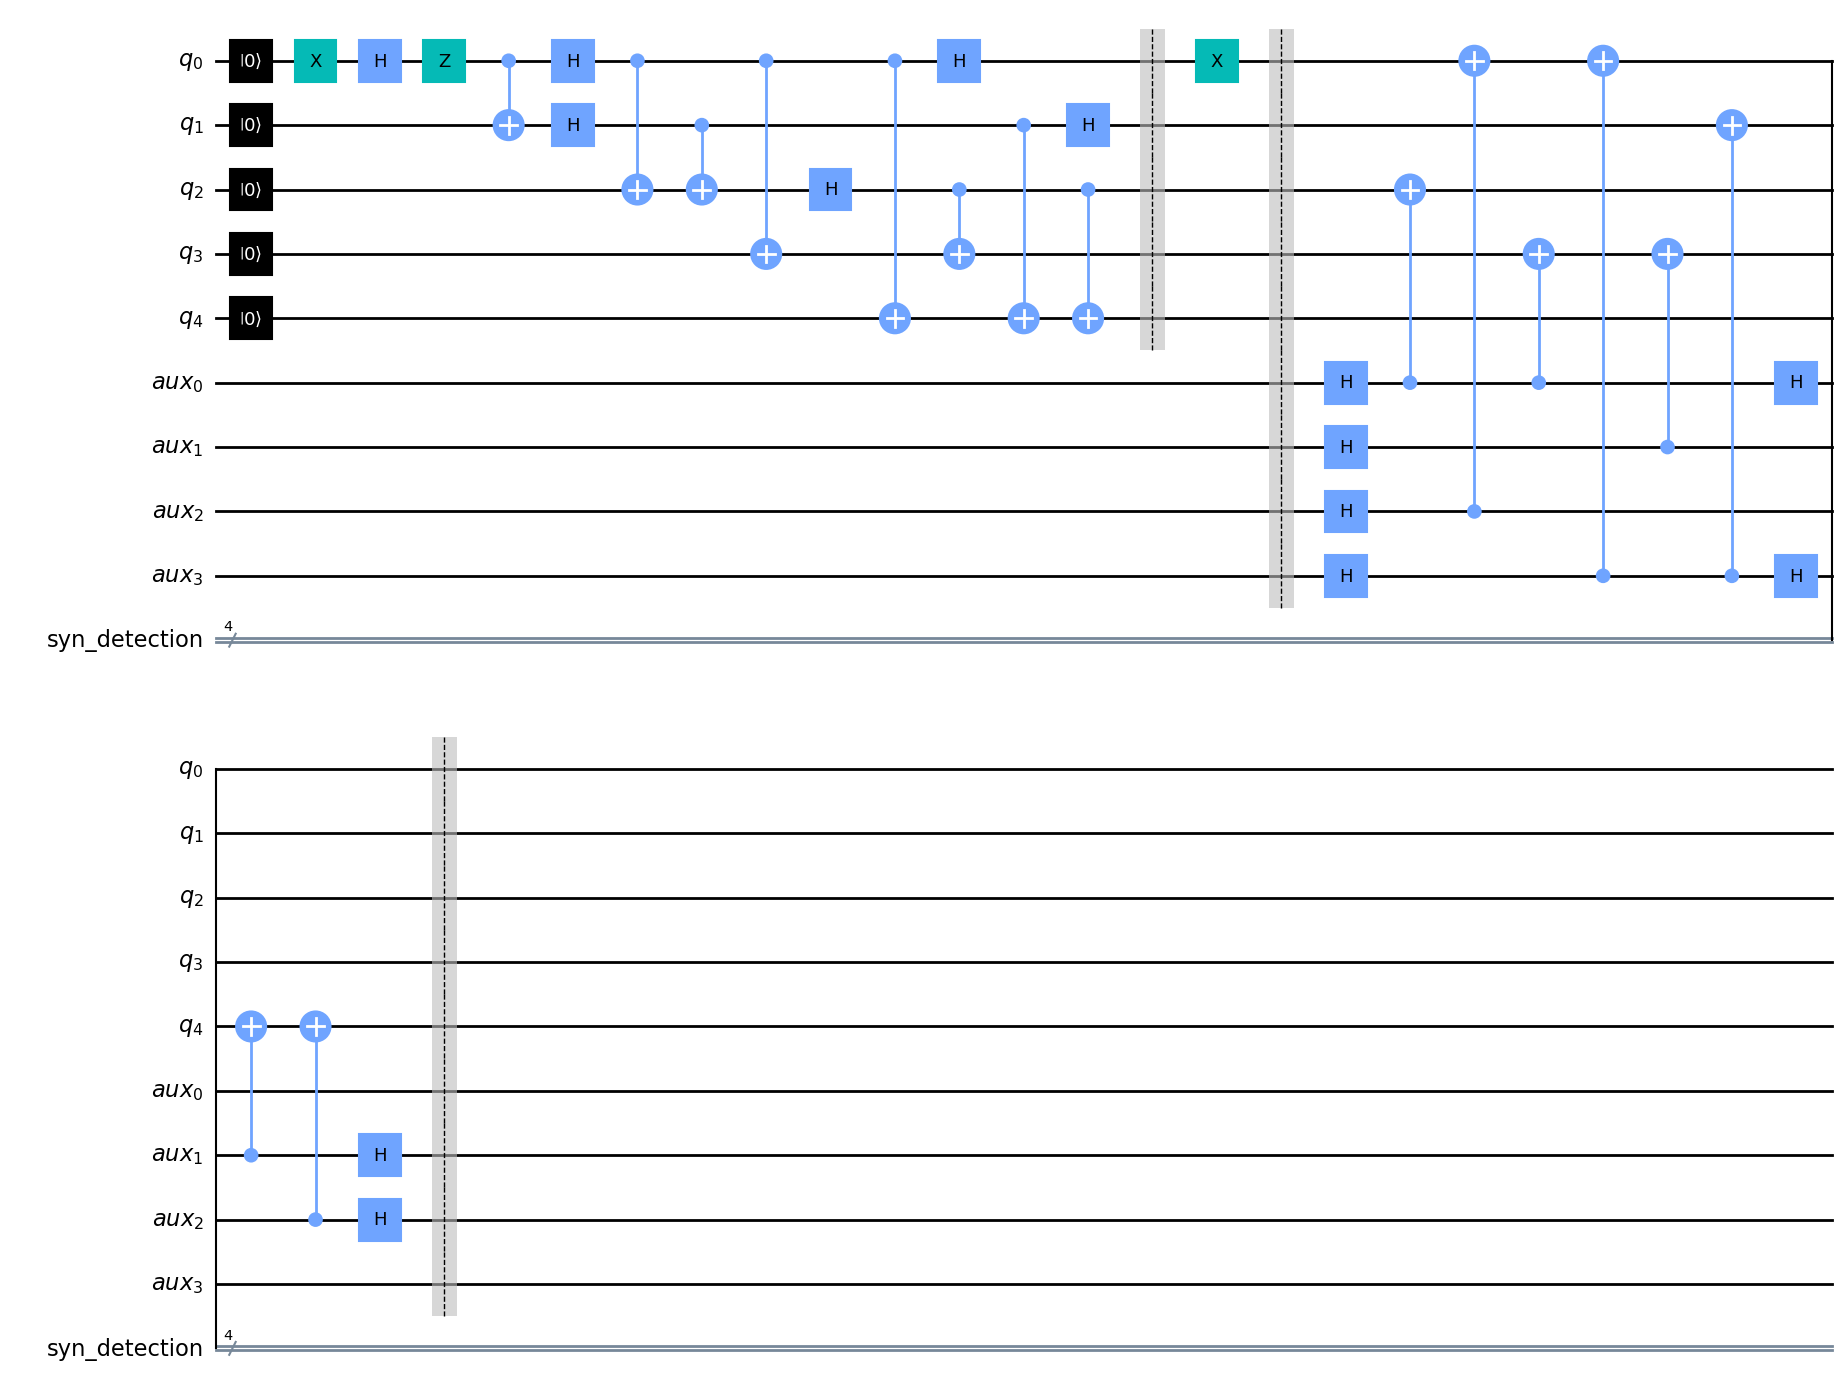

In [6]:
# Syndrome Detection
qc.barrier()

for i in range(4):
  qc.h(5+i)

qc.cx(5, 2)
qc.cx(5, 3)

qc.cx(6, 3)
qc.cx(6, 4)

qc.cx(7, 0)
qc.cx(7, 4)

qc.cx(8, 0)
qc.cx(8, 1)

for i in range(4):
  qc.h(5+i)

qc.barrier()
qc.draw('mpl')

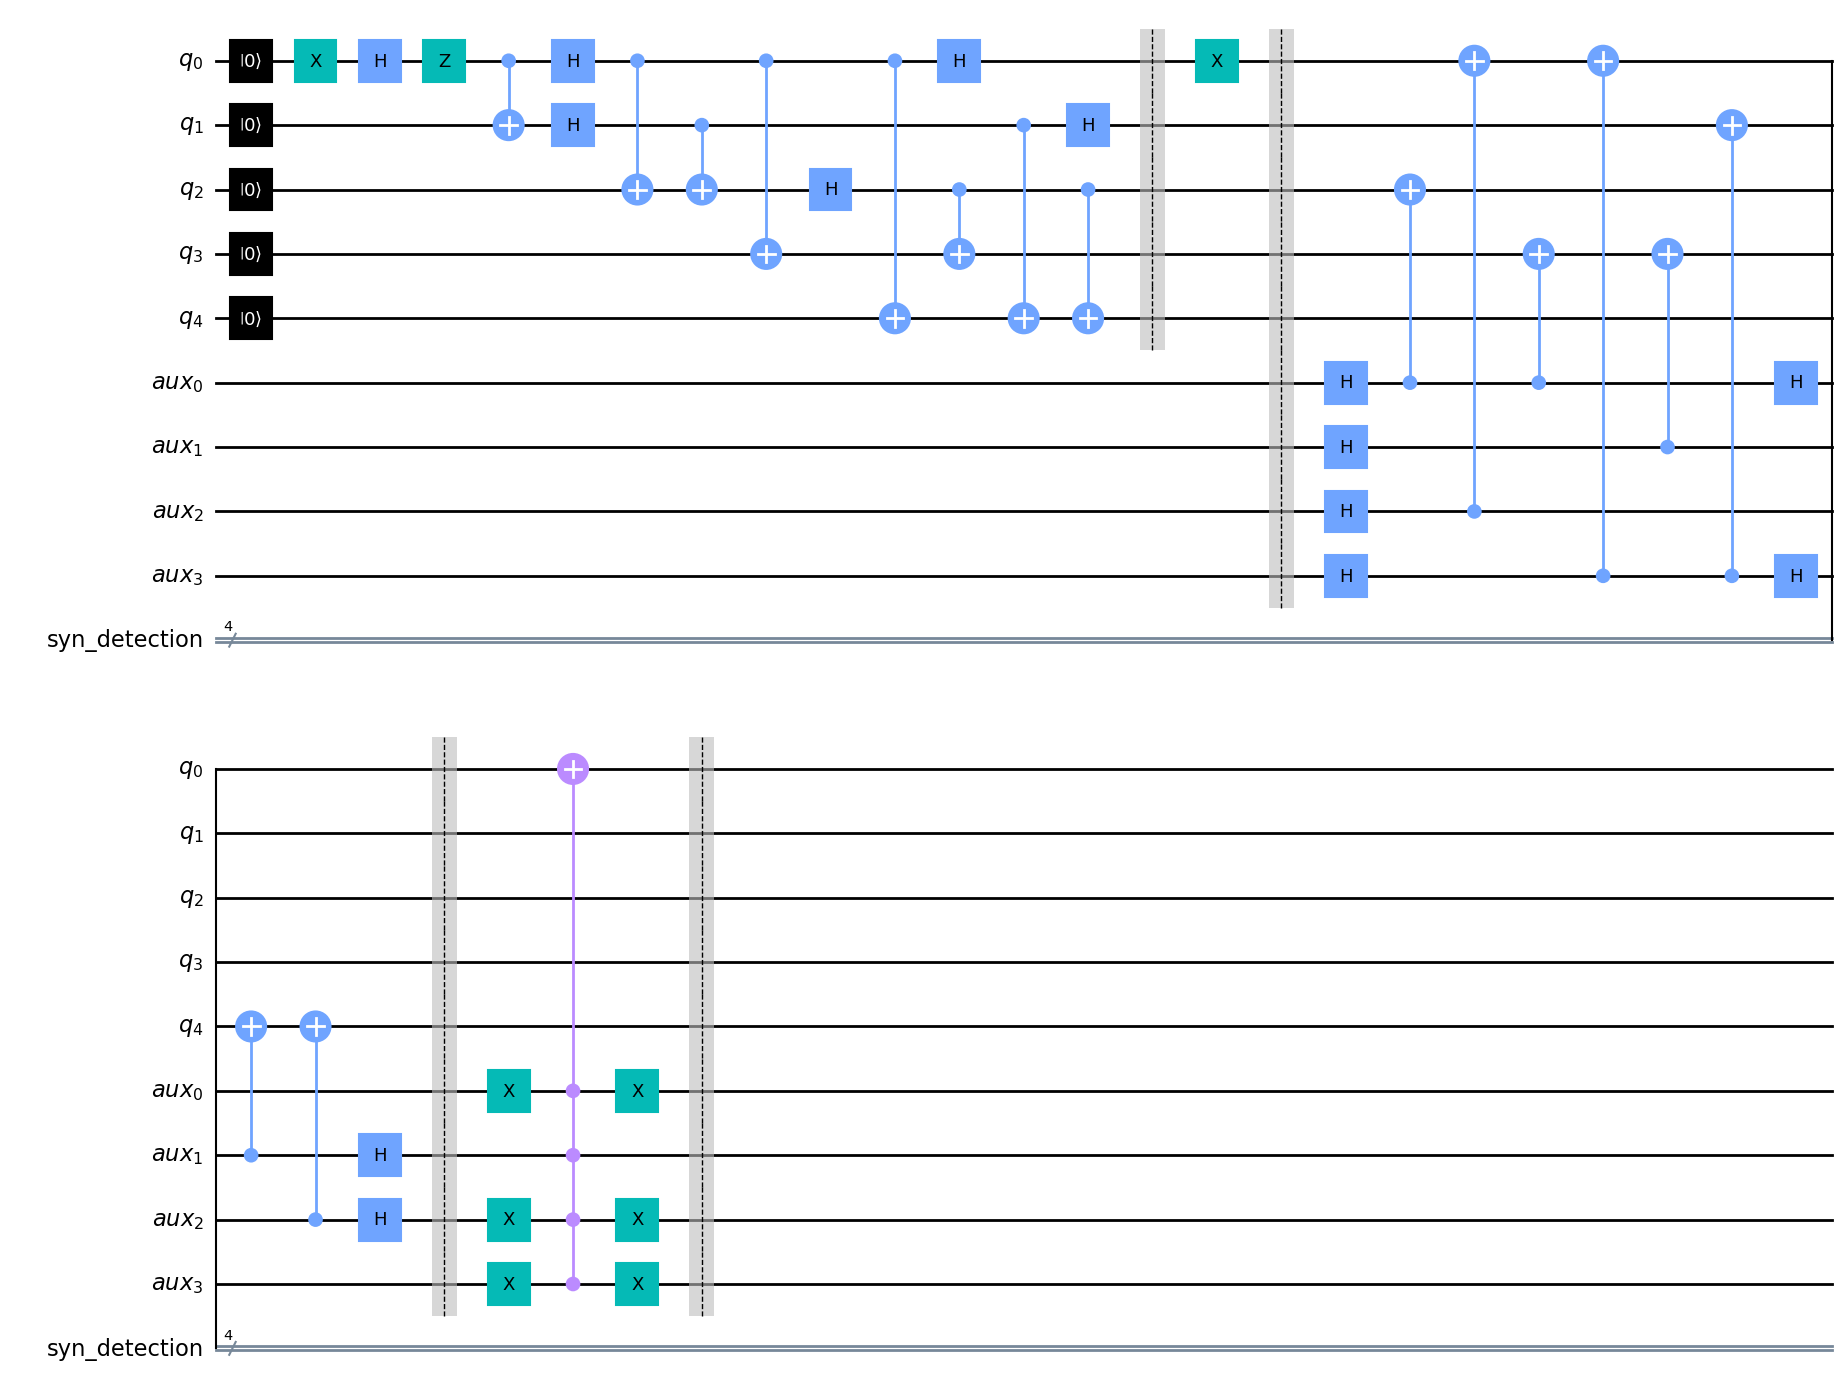

In [7]:
#Error correction only for 1st Bit flip error: 
#Should be 0100 at the output
cx4 = MCMT('cx', 4, 1)
qc.x(5)
qc.x(7)
qc.x(8)
qc.compose(cx4, qubits=[5, 6, 7, 8, 0], inplace=True)
qc.x(5)
qc.x(7)
qc.x(8)

qc.barrier()
qc.draw('mpl')

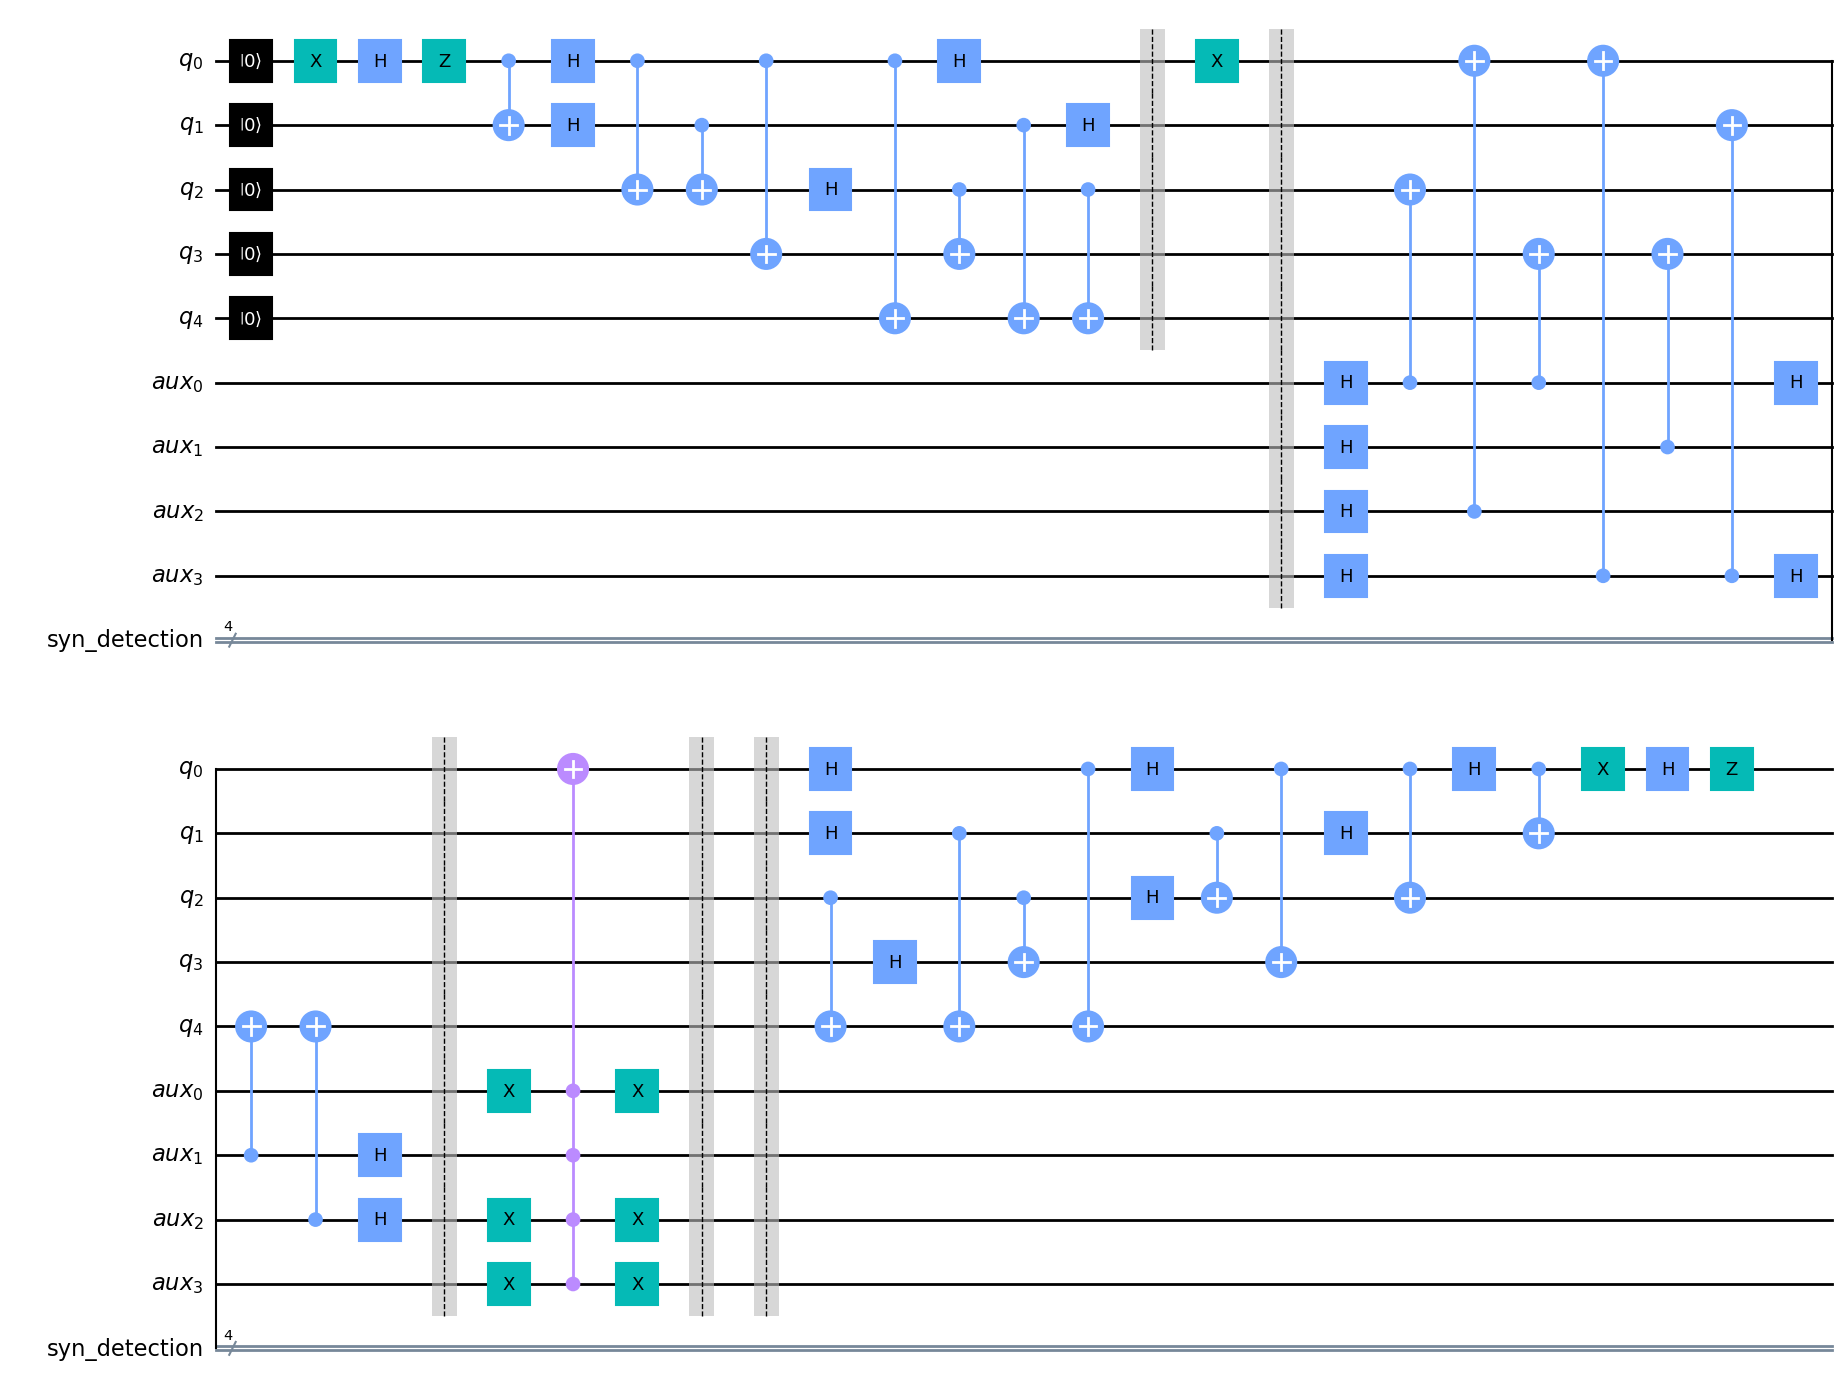

In [8]:
qc.barrier()
qc.h(0)
qc.h(1)

qc.cx(2, 4)
qc.cx(1, 4)
qc.cx(0, 4)
qc.h(0)
qc.h(3)

qc.cx(2, 3)
qc.cx(0, 3)

qc.h(2)
qc.cx(1, 2)
qc.cx(0, 2)

qc.h(0)
qc.h(1)

qc.cx(0, 1)

qc.x(0)
qc.h(0) 
qc.z(0)

qc.draw('mpl')

In [ ]:
qc_trans = transpile(qc, sim)
syndrome = sim.run(qc_trans, shots=1, memory=True).result().get_memory()
print(syndrome)